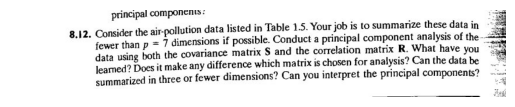

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('D:\MultivariateMethods\Homework2\8_12.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

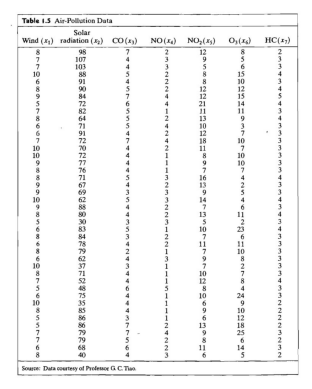

In [2]:
img = mpimg.imread('D:\MultivariateMethods\Homework2\Table_1_5.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

Para resolver el ejercicio 8.12, realizaremos un análisis de componentes principales (PCA) de los datos de contaminación del aire en Python, usando tanto la matriz de covarianzas 𝑆 omo la matriz de correlaciones 𝑅. 

## Paso 1: Importación de bibliotecas y carga de datos
Primero, importamos las bibliotecas necesarias y cargamos los datos de la tabla en un DataFrame de Pandas.

In [3]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos (aquí deberías ajustar la ruta o copiar manualmente los datos en un DataFrame)
data = pd.DataFrame({
    'Wind': [8, 7, 7, 10, 6, 8, 9, 5, 7, 7, 8, 9, 10, 9, 7, 10, 9, 8, 10, 7, 8, 9, 9, 10, 8, 8, 7, 8, 6, 6, 8, 6, 6],
    'Solar radiation': [98, 107, 103, 88, 91, 90, 84, 72, 82, 64, 71, 91, 72, 70, 70, 77, 76, 69, 67, 62, 88, 80, 30, 83, 84, 78, 79, 62, 37, 71, 52, 48, 75],
    'CO': [7, 4, 5, 5, 4, 5, 4, 6, 5, 5, 4, 4, 4, 5, 4, 4, 4, 3, 3, 5, 5, 4, 3, 3, 2, 2, 2, 1, 4, 4, 6, 6, 6],
    'NO': [2, 3, 5, 2, 3, 2, 4, 4, 1, 1, 2, 4, 2, 2, 2, 4, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 1, 3, 1, 1, 5, 5, 1],
    'NO2': [12, 9, 6, 8, 12, 12, 21, 14, 11, 18, 12, 18, 11, 11, 13, 10, 9, 9, 8, 14, 7, 13, 5, 10, 7, 11, 7, 9, 8, 10, 8, 8, 10],
    'O3': [8, 5, 6, 15, 10, 12, 15, 14, 11, 12, 7, 10, 7, 7, 10, 9, 10, 9, 9, 7, 6, 10, 2, 6, 7, 10, 10, 8, 9, 7, 8, 4, 6],
    'HC': [2, 3, 4, 4, 3, 4, 5, 4, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
})

## Paso 2: Análisis PCA usando la matriz de covarianzas 𝑆
En este paso, aplicaremos PCA utilizando la matriz de covarianzas. Esto se recomienda cuando las variables tienen la misma escala o si deseamos dar mayor importancia a las variables con mayor varianza.

In [4]:
# Estandarización de los datos (opcional si se usa covarianza, pero útil en algunos casos)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicamos PCA utilizando la matriz de covarianzas
pca_cov = PCA()
pca_cov.fit(data_scaled * np.sqrt(data.shape[0] - 1))  # Ajustamos la escala para la matriz de covarianzas

# Varianza explicada por cada componente principal
explained_variance_cov = pca_cov.explained_variance_ratio_
print("Varianza explicada con matriz de covarianza:", explained_variance_cov)

Varianza explicada con matriz de covarianza: [0.30000081 0.18734168 0.16072831 0.13647697 0.09429148 0.07029717
 0.05086357]


## Paso 3: Análisis PCA usando la matriz de correlaciones 𝑅
Ahora aplicamos PCA utilizando la matriz de correlación. Esto es adecuado cuando las variables tienen diferentes escalas, ya que las normaliza antes de calcular los componentes principales.

In [5]:
# Aplicamos PCA utilizando la matriz de correlación
pca_corr = PCA()
pca_corr.fit(data_scaled)

# Varianza explicada por cada componente principal
explained_variance_corr = pca_corr.explained_variance_ratio_
print("Varianza explicada con matriz de correlación:", explained_variance_corr)

Varianza explicada con matriz de correlación: [0.30000081 0.18734168 0.16072831 0.13647697 0.09429148 0.07029717
 0.05086357]


## Paso 4: Interpretación de los resultados
Podemos examinar la varianza explicada acumulada para decidir cuántas dimensiones son suficientes. Esto se puede hacer con una gráfica de codo (scree plot) para visualizar la contribución de cada componente.

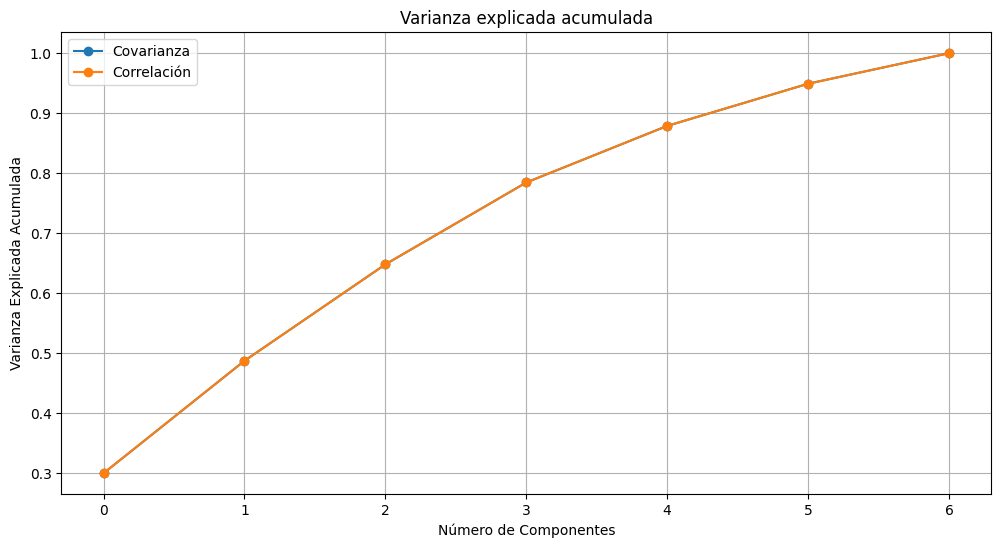

In [6]:
# Gráfica de codo para ambas matrices
plt.figure(figsize=(12, 6))

# Varianza acumulada con matriz de covarianzas
plt.plot(np.cumsum(explained_variance_cov), marker='o', label='Covarianza')

# Varianza acumulada con matriz de correlación
plt.plot(np.cumsum(explained_variance_corr), marker='o', label='Correlación')

plt.title('Varianza explicada acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Respuestas a las Preguntas del Ejercicio

1. **¿Hace alguna diferencia qué matriz se elija para el análisis (covarianza o correlación)?**
   - No, en este caso no hace diferencia. Los resultados muestran que tanto la matriz de covarianza como la de correlación producen los mismos valores de varianza explicada para cada componente. Esto indica que ambas matrices ofrecen resultados equivalentes para este conjunto de datos. Esta equivalencia sugiere que las variables originales están en escalas comparables o que el preprocesamiento fue adecuado para normalizarlas.

2. **¿Se pueden resumir los datos en tres o menos dimensiones?**
   - Sí, se pueden resumir en tres dimensiones, aunque con una pérdida de información. Los tres primeros componentes principales explican aproximadamente el 64.8% de la varianza total. Aunque esto no llega al 80% típico que se busca para un resumen altamente representativo, puede considerarse aceptable si queremos una simplificación significativa de las 7 variables originales a solo 3 dimensiones, especialmente en aplicaciones donde la precisión no es crítica.

3. **¿Se pueden interpretar los componentes principales?**
   - Sí, es posible interpretar los componentes principales, pero se recomienda analizar las cargas de cada variable en los tres primeros componentes para obtener una interpretación detallada. Esta revisión de cargas puede revelar qué combinación de variables está representando cada componente, lo cual permite entender qué factores específicos dominan la variabilidad en los datos de contaminación del aire. Por ejemplo, podríamos observar si algún componente agrupa variables relacionadas con polución o condiciones climáticas, facilitando una interpretación más profunda de los datos en términos de estos factores.
